In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **Exploratory Data Analysis**

In [3]:
file = pd.read_csv('/content/drive/MyDrive/GENAI/Week4/Day3/data.csv')
df = pd.DataFrame(file)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(569, 33)

Ce dataframe contient 569 lignes et 33 colonnes. Il porte sur la prédiction de la gravité du cancer du sein, chaque ligne représentant un cas individuel et chaque colonne correspondant à une feature liée à ce cas.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.isna().mean() * 100

,0
id,0.0
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0


Le jeu de données ne contient aucune valeur nulle, à l’exception de la colonne Unnamed: 32, qui a été générée lors de la lecture du fichier CSV. Cette colonne sera supprimée, tout comme la colonne id, car aucune des deux n’apporte d'information utile sur les caractéristiques du cancer du sein.

In [9]:
df.drop(columns=['Unnamed: 32', 'id'], inplace=True)

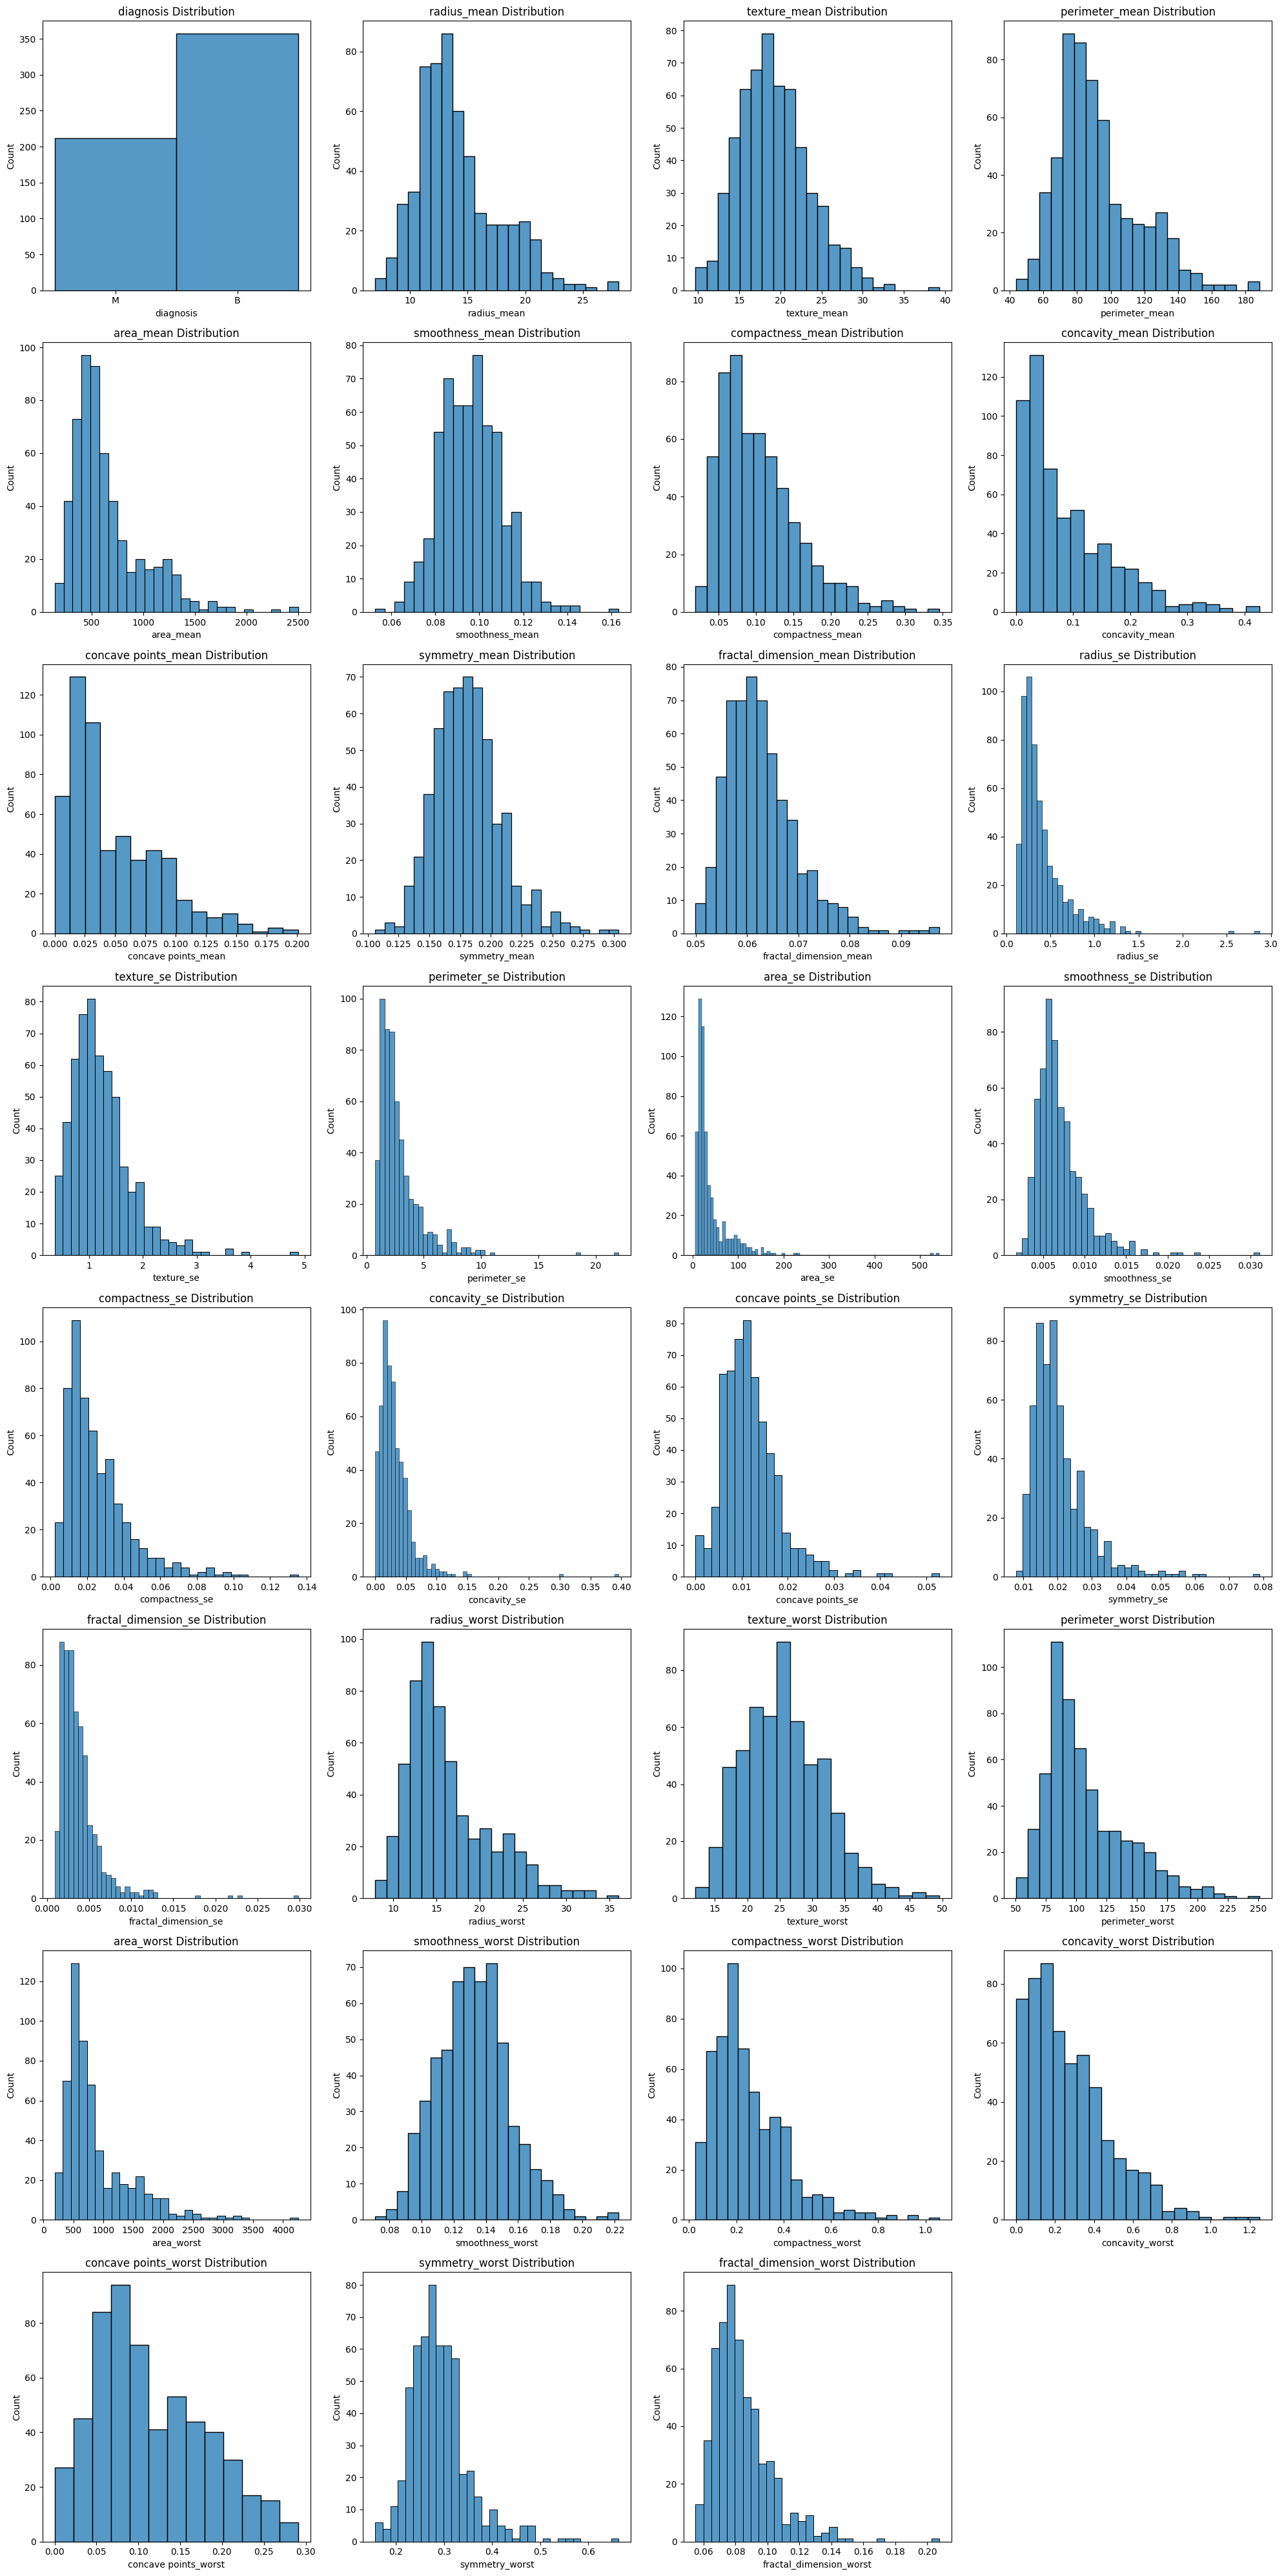

In [10]:
n_cols = len(df.columns)
n_cols_per_row = 4
n_rows = (n_cols + n_cols_per_row - 1) // n_cols_per_row

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(5 * n_cols_per_row, 5 * n_rows))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(f"{col} Distribution")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import zscore

df_features = df.drop(columns=['diagnosis'])
z_scores = zscore(df_features)
outliers = df[(np.abs(z_scores) > 2).any(axis=1)]
outliers

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.5390,0.2060,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
df2 = df.copy()

In [13]:
df2.drop(outliers.index, inplace=True)

On retire les outliers des features du dataset afin de réduire l’influence des valeurs extrêmes sur les résultats du modèle.

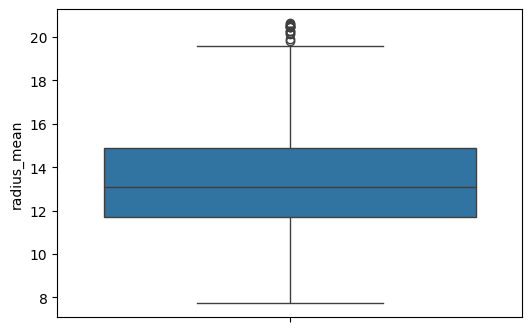

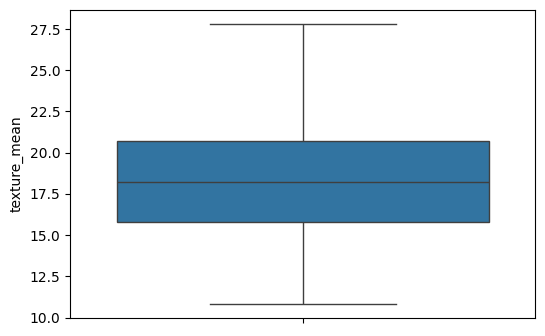

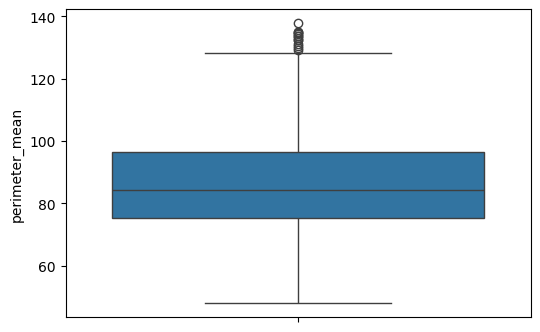

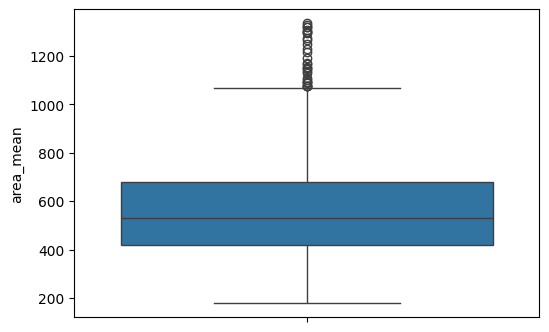

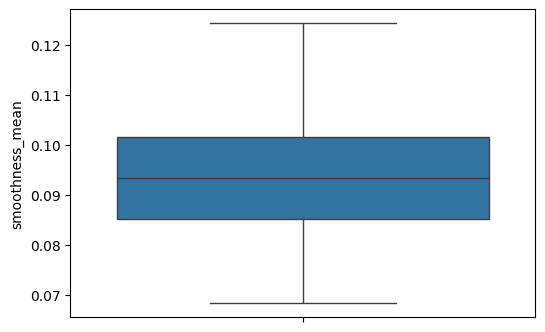

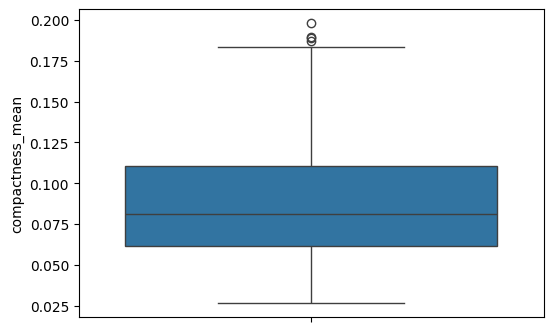

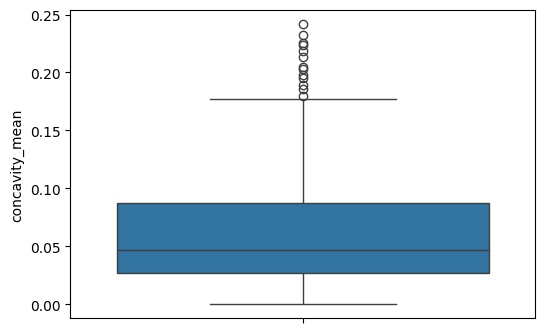

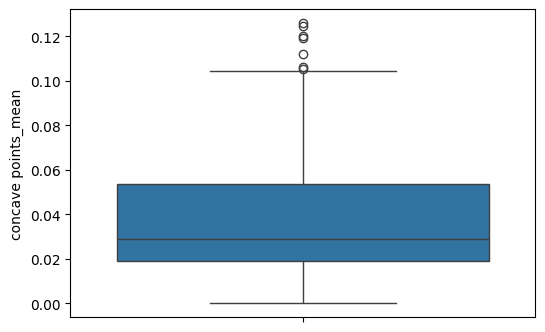

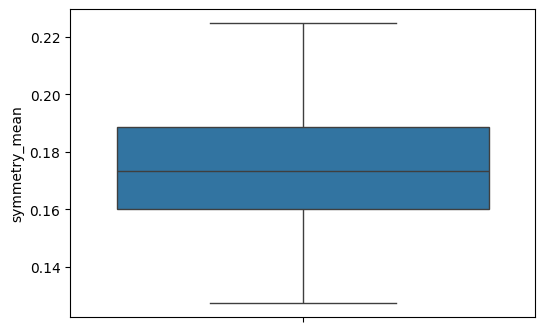

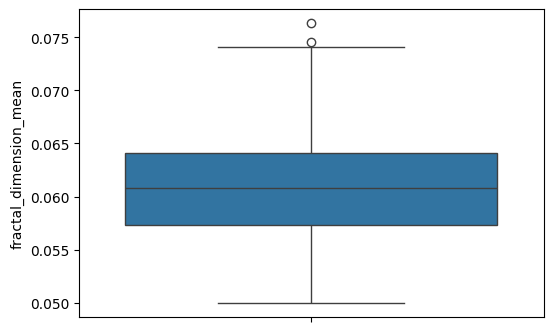

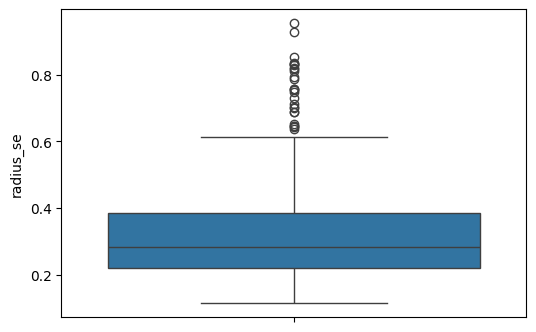

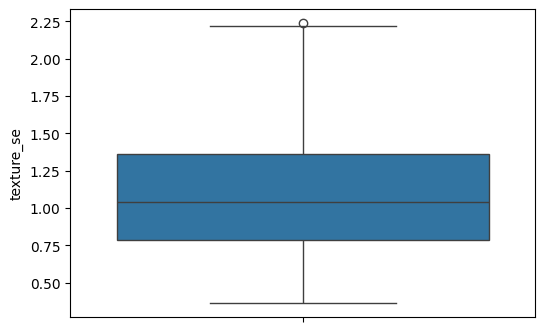

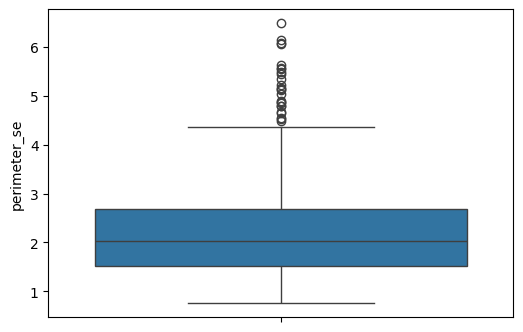

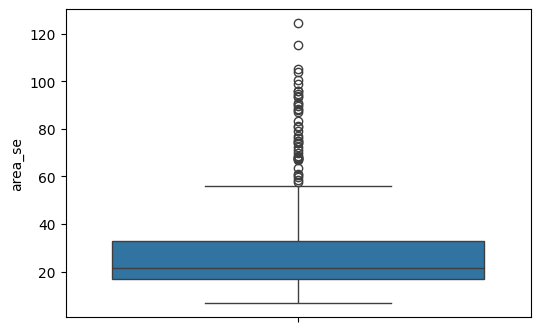

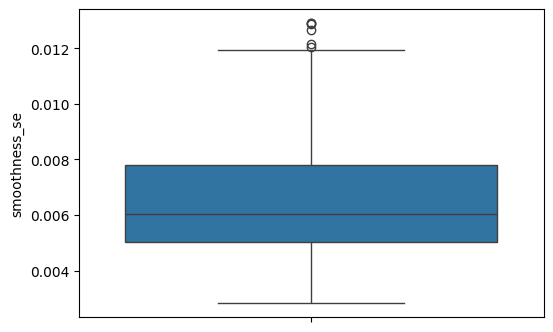

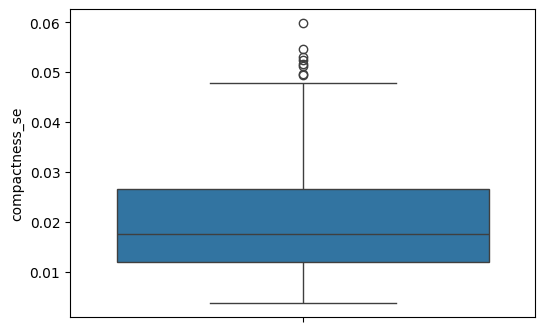

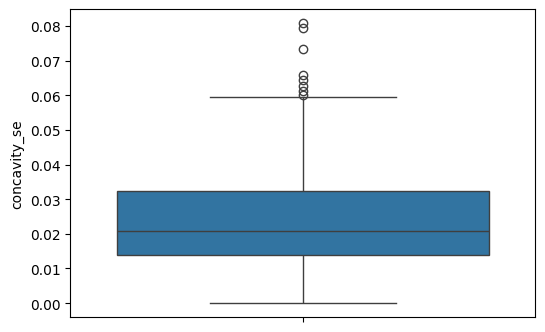

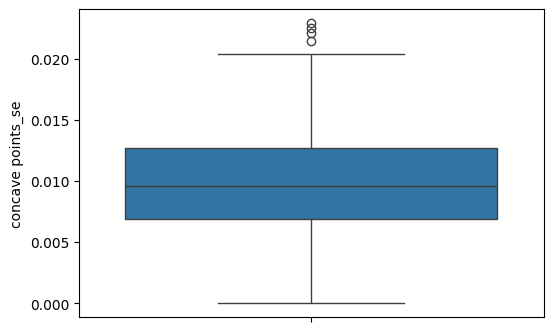

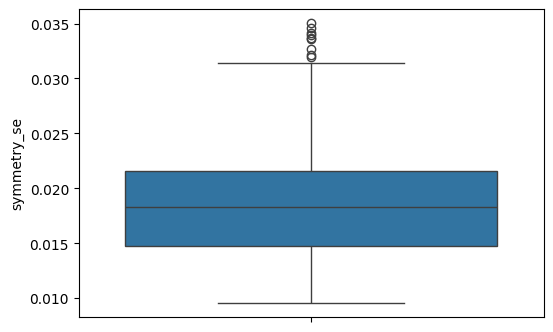

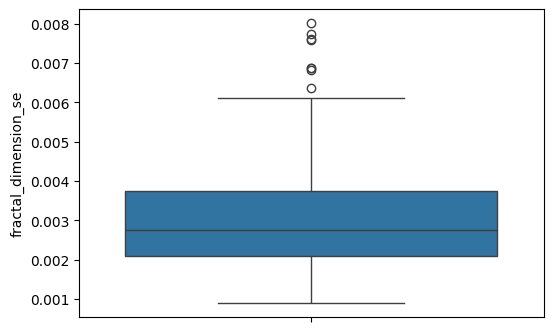

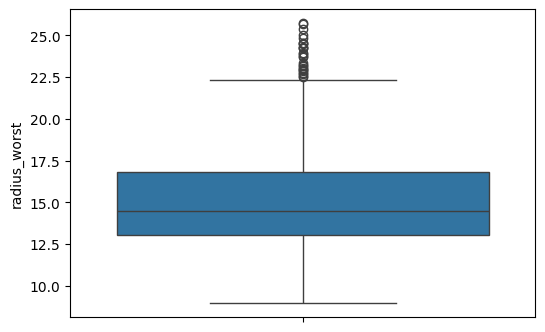

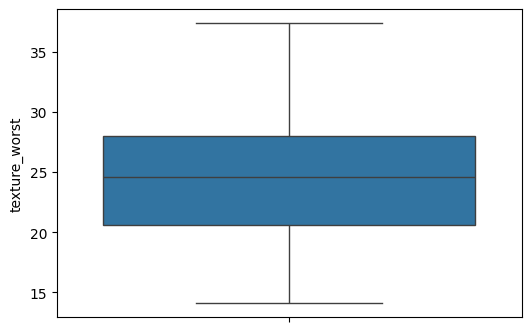

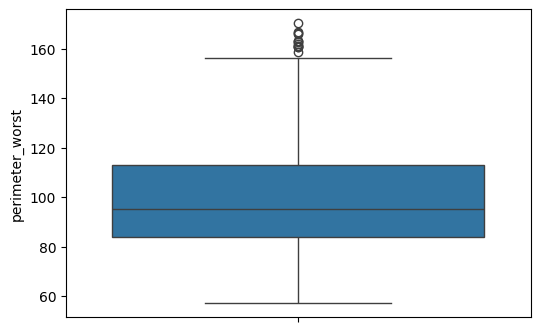

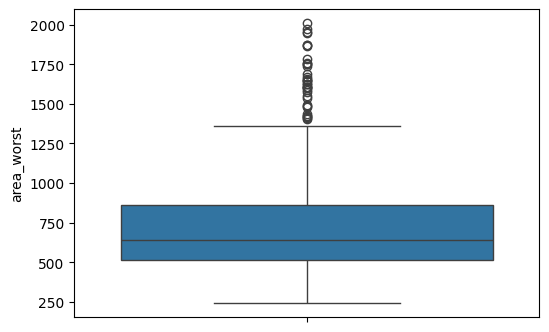

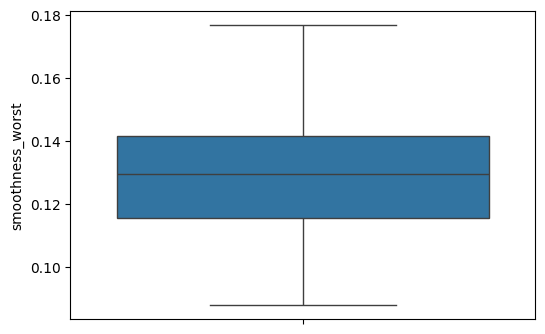

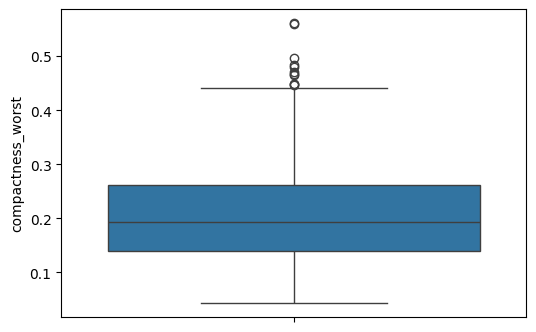

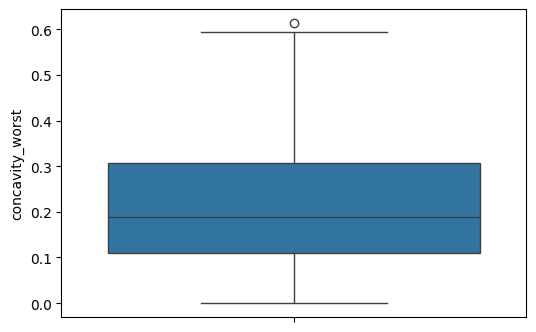

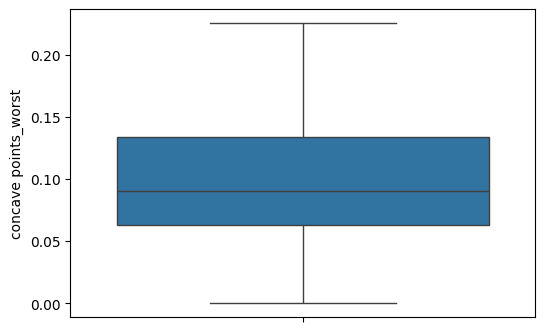

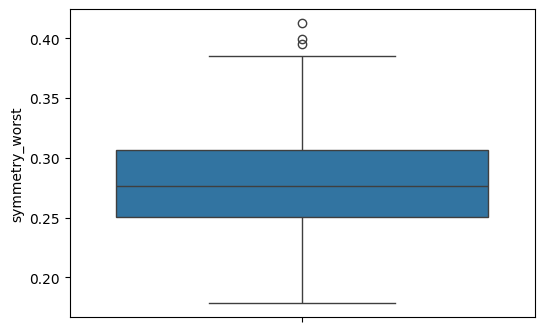

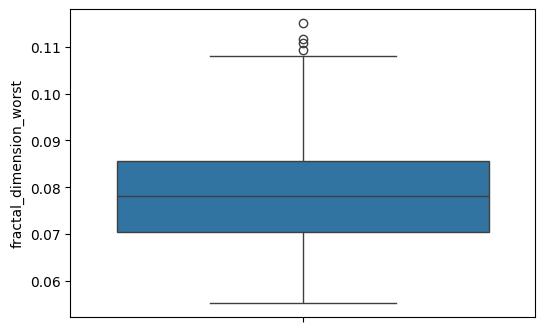

In [14]:
for col in df2.columns[1:]:
  plt.figure(figsize=(6,4))
  sns.boxplot(df2[col])
  plt.show()

/tmp/ipython-input-15-165329868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='diagnosis', palette = 'magma')


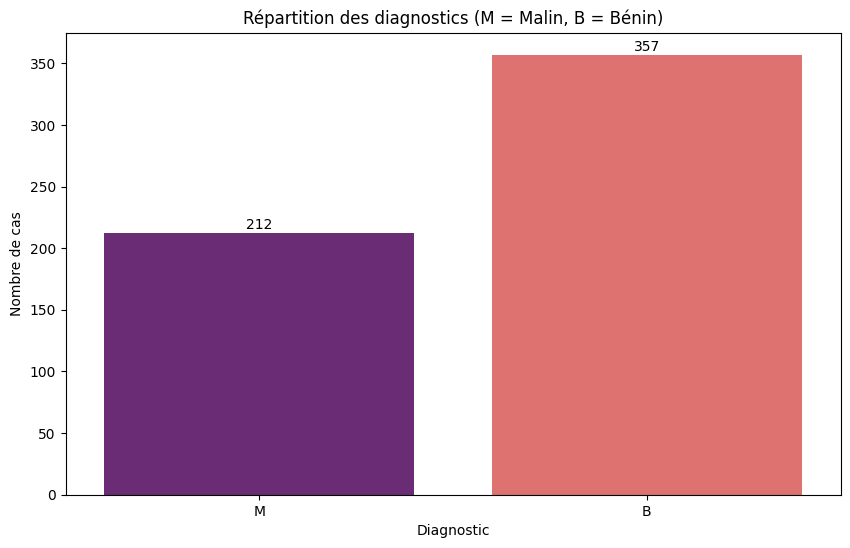

In [15]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='diagnosis', palette = 'magma')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,
        int(height),
        ha="center", va="bottom", fontsize=10
    )
plt.title('Répartition des diagnostics (M = Malin, B = Bénin)')
plt.xlabel('Diagnostic')
plt.ylabel('Nombre de cas')
plt.show()

Les tumeurs bénignes sont majoritaires dans le jeu de données (environ 63 % des cas).

Les tumeurs malignes (37%), sont en minorité.

la feature diagnostic est unbalenced est devra donc être réajustée

# **Data Preprocessing**

In [16]:
df2.shape[0]

382

Suite a la première étape de préprocessing, il nous reste 382 cas uniques dans notre dataframe

In [17]:
pd.set_option('display.max_columns', None)

df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
4,M,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
6,M,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,M,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,M,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


On map la feature diagnosis en données numérique dans l'objectif d'appliquer un algorithme de machine learning par la suite

In [18]:
df2["diagnosis"] = df2["diagnosis"].map({"M": 1, "B": 0})

On sépare les données en sets d'entrainement et de test pour eviter l'overfitting du modèle

In [19]:
from sklearn.model_selection import train_test_split

x = df2.drop(columns=['diagnosis'])
y = df2['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Building Models**

On entraine nos modèles sur le set d'entrainement et on les teste sur le set de test

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

log_reg = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
svm = SVC()


log_reg.fit(x_train, y_train)
knn.fit(x_train, y_train)
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)

y_pred_log_reg = log_reg.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_svm = svm.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Which is the best model ?**

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    "Accuracy" : [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm)],
    "Precision" : [precision_score(y_test, y_pred_log_reg), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_svm)],
    "Recall" : [recall_score(y_test, y_pred_log_reg), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_svm)],
    "F1 Score" : [f1_score(y_test, y_pred_log_reg), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_svm)]
}

metrics = pd.DataFrame(metrics, index=["Logistic regression", "kNN", "Random Forest", "SVM"])
metrics

,Accuracy,Precision,Recall,F1 Score
Logistic regression,0.961039,0.909091,0.952381,0.930233
kNN,0.935065,0.944444,0.809524,0.871795
Random Forest,0.974026,0.952381,0.952381,0.952381
SVM,0.909091,0.937500,0.714286,0.810811


Dans le cadre du diagnostic d’un cancer du sein, il est essentiel de privilégier le recall afin de limiter les faux négatifs. Les modèles logistic regression et random forest obtiennent le meilleur recall (0.952), mais random forest est préféré car il offre également une meilleure précision (0.952) et accuracy (0.974).

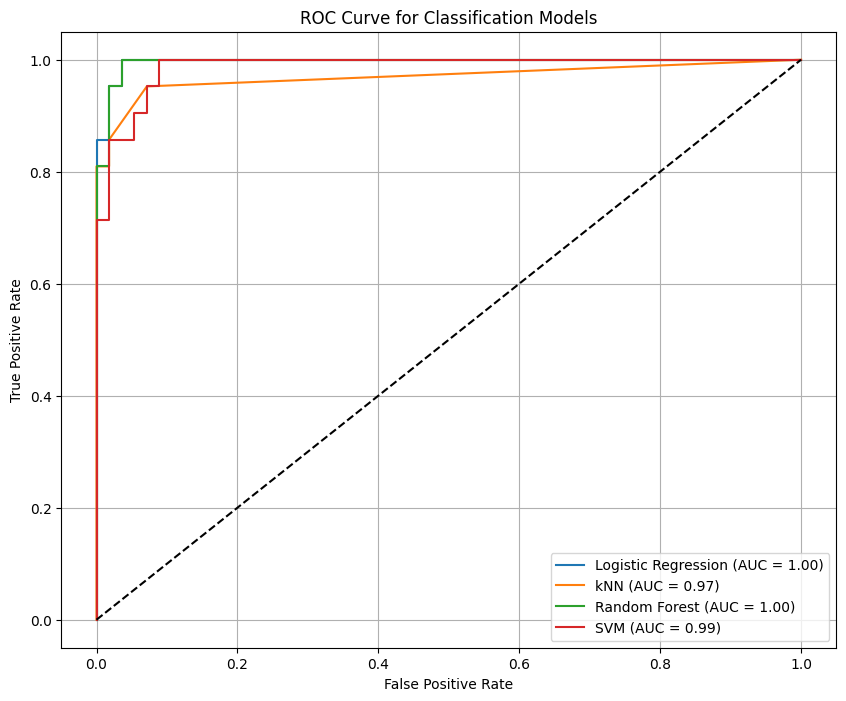

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

svm = SVC(probability=True)
svm.fit(x_train, y_train)

y_prob_log_reg = log_reg.predict_proba(x_test)[:, 1]
y_prob_knn = knn.predict_proba(x_test)[:, 1]
y_prob_rf = rf.predict_proba(x_test)[:, 1]
y_prob_svm = svm.predict_proba(x_test)[:, 1]

fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_prob_log_reg)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)

auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
auc_knn = roc_auc_score(y_test, y_prob_knn)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_svm = roc_auc_score(y_test, y_prob_svm)


plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'kNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classification Models')
plt.legend()
plt.grid(True)
plt.show()

  La ROC curve permet de confirmer nos observations précédentes, tous les modèles testés présentent d’excellentes performances de classification, avec des AUC proches de 1. Les modèles Random Forest et Logistic Regression atteignent un score AUC parfait de 1.00